Importing the neccessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

Since I used the google colab next step is to bring in the data for the problem

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving twm_accounts.csv to twm_accounts.csv
Saving twm_checking_acct.csv to twm_checking_acct.csv
Saving twm_checking_tran.csv to twm_checking_tran.csv
Saving twm_credit_acct.csv to twm_credit_acct.csv
Saving twm_credit_tran.csv to twm_credit_tran.csv
Saving twm_customer.csv to twm_customer.csv
Saving twm_savings_acct.csv to twm_savings_acct.csv
Saving twm_savings_tran.csv to twm_savings_tran.csv
Saving twm_transactions.csv to twm_transactions.csv


Import the customer data as a dataframe.

In [3]:
df_customer=pd.read_csv('twm_customer.csv',delimiter=';')
df_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


Exploring the data

In [4]:
df_customer.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

To check if there is any missing values in the data.

In [5]:
#to know the missing values of customers
total = df_customer.isnull().sum().sort_values(ascending=False)
percent = (df_customer.isnull().sum()/df_customer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
state_code,0,0.0
city_name,0,0.0
postal_code,0,0.0
street_name,0,0.0
street_nbr,0,0.0
last_name,0,0.0
first_name,0,0.0
name_prefix,0,0.0
marital_status,0,0.0
gender,0,0.0


There is no missing data in the customer data.

In [7]:
df_customer['marital_status'] = df_customer['marital_status'].astype('category')
segmentation_cols = ['income','age','years_with_bank','nbr_children','gender', 'marital_status']
df_seg = df_customer[segmentation_cols]
df_seg = pd.get_dummies(df_seg, drop_first=True)
df_seg.head()

,income,age,years_with_bank,nbr_children,gender_M,marital_status_2,marital_status_3,marital_status_4
0,26150,46,5,1,1,1,0,0
1,6605,71,1,0,1,1,0,0
2,18548,38,8,0,0,0,0,0
3,47668,54,3,0,0,0,0,0
4,44554,59,9,2,0,0,0,1


Scaling the data using the MinMaxScaler.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_seg_scaled = pd.DataFrame(scaler.fit_transform(df_seg), columns = df_seg.columns)

Plotting the elbow plot to determine the number of clusters.

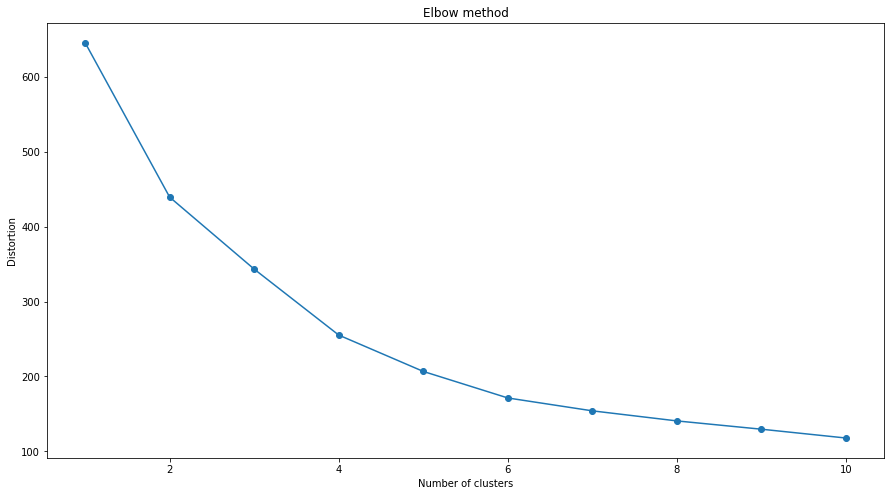

In [9]:
# import Kmeans 
from sklearn.cluster import KMeans
#import matplotlib
import matplotlib.pyplot as plt
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()
plot_inertia(df_seg_scaled)

From the elbow plot the number of clusters if 4.Kmeans clustering is applied on the data.

In [12]:
#assign cluster to customers
df_seg_scaled['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(df_seg_scaled)
# clusters size
df_seg_scaled['cluster'].value_counts()

1    229
2    189
3    165
0    164
Name: cluster, dtype: int64

Preping the data to plot the radar plot to understand the clusters better.

In [13]:
# data to radar chart
df_radar = df_seg_scaled.groupby('cluster').mean().divide(df_seg_scaled.drop('cluster',axis=1).mean())*100
df_radar.head()

,income,age,years_with_bank,nbr_children,gender_M,marital_status_2,marital_status_3,marital_status_4
cluster,,,,,,,,
0,133.281408,129.379965,107.201138,142.446561,227.051672,211.614731,0.000000,0.000000
1,74.415666,76.658168,98.452542,63.529758,0.000000,0.000000,203.875546,186.400499
2,102.834007,127.199145,101.280608,141.367933,0.000000,211.614731,0.000000,0.000000
3,99.182026,72.038344,93.523311,61.041879,227.051672,0.000000,169.772727,194.025974


The function for the radar plot.

In [11]:
import plotly.graph_objects as go
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
plot_radar_chart(df_radar)